**Importing libaries**



*   **- %matplotlib inline to enables inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written.**
*   **-rcParams audjust the configuration of the plot i am creating**




In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8) 

**Read in Dataset**

In [ ]:
#Load data from local drive 
#To upload the file from the local drive write the following code in the cell and run it

from google.colab import files
uploaded = files.upload()
#Click on “choose files”, then select and download the CSV file from your local drive.


#Later write the following code snippet to import it into a pandas dataframe.

import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
print(df)

Saving movies.csv to movies.csv
                                                name  ... runtime
0                                        The Shining  ...   146.0
1                                    The Blue Lagoon  ...   104.0
2     Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                          Airplane!  ...    88.0
4                                         Caddyshack  ...    98.0
...                                              ...  ...     ...
7663                                    More to Life  ...    90.0
7664                                     Dream Round  ...    90.0
7665                                   Saving Mbango  ...     NaN
7666                                    It's Just Us  ...   120.0
7667                                       Tee em el  ...   102.0

[7668 rows x 15 columns]


In [ ]:
#checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [ ]:
#dropping the Null values
df.dropna(inplace = True)

In [ ]:
#Rechecking the data to be sure Nullvlues have been removed
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [ ]:
#checking for the datatypes f the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

chainging the columns from float type to int64

In [ ]:
#changing the type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [ ]:
#displying the full datasets
#pd.set_option ('display.max_row',5421)
pd.set_option ('display.max_row',None)

In [ ]:
#creating a new column for named correct year, because few datas between the released and year column seem to not match
#from the code below,the ".str.replace" deleted the parenthesis and cotent inside the parenthesis, then i used the ".str" to retract the last 4 value which is the year

df['Correct Year'] = df['released'].astype('str').str.replace(r"\s+\(.*\)","").str[-4:]

In [ ]:
#df.drop('CYear', inplace=True, axis=1)

In [ ]:
df.head(5)

name  rating  genre  year  ...      gross  company  runtime  Correct Year
0  4692       6      6  1980  ...   46998772     1426      146             0
1  3929       6      1  1980  ...   58853106      452      104             0
2  3641       4      0  1980  ...  538375067      945      124             0
3   204       4      4  1980  ...   83453539     1108       88             0
4   732       6      4  1980  ...   39846344     1083       98             0

[5 rows x 16 columns]

Sorting the Data by the Gross column

In [ ]:
#sorting the dataframe by the gross using the .sort-values()
df.sort_values(by = 'gross', inplace = False, ascending = False)

name  rating  genre  year  ...       gross  company  runtime  Correct Year
5445   386       5      0  2009  ...  2847246203     1382      162            29
7445   388       5      0  2019  ...  2797501328      983      181            39
3045  4909       5      6  1997  ...  2201647264     1382      194            17
6663  3643       5      0  2015  ...  2069521700      945      138            35
7244   389       5      0  2018  ...  2048359754      983      149            38
7480  4388       4      2  2019  ...  1670727580     1423      118            39
6653  2117       5      0  2015  ...  1670516444     1397      124            35
6043  3878       5      0  2012  ...  1518815515      983      143            32
6646  1541       5      0  2015  ...  1515341399     1397      137            35
7494  1530       4      2  2019  ...  1450026933     1422      103            39
6644   387       5      0  2015  ...  1402809540      983      141            35
7247   567       5      0  2018  ...  1347597973      983      134            38
5845  1731       5      1  2011  ...  1342321665     1426      130            31
7075  3644       5      0  2017  ...  1332698830     1423      152            37
7271  2118       5      0  2018  ...  1310466296     1397      128            38
6262  1529       4      2  2013  ...  1281508100     1422      102            33
7072   477       4      7  2017  ...  1264434525      976      129            37
7281  1966       4      2  2018  ...  1244639527     1423      118            38
7055  4119       5      0  2017  ...  1236005118     1397      136            37
6244  2014       5      0  2013  ...  1214811252      983      130            33
6688  2545       4      2  2015  ...  1159444662      820       91            35
6846   750       5      0  2016  ...  1153337496      983      147            36
7250   343       5      0  2018  ...  1148485886     1426      143            38
4245  4407       5      0  2003  ...  1146030912     1044      201            23
7458  3595       5      0  2019  ...  1131927996      452      129            39
7456   755       5      0  2019  ...  1128462972     1423      123            39
5878  4950       5      0  2011  ...  1123794079     1108      154            31
6059  3498       5      0  2012  ...  1108569499     1001      143            32
6494  4949       5      0  2014  ...  1104054072     1108      165            34
2448  4388       1      2  1994  ...  1083720877     1423       88            14
6047  4048       5      0  2012  ...  1081142612     1426      164            32
7463  3640       5      0  2019  ...  1078232589     1423      141            39
7450  2091       6      5  2019  ...  1074427370     1426      122            39
7488  4936       1      2  2019  ...  1073394593     1134      100            39
5685  4935       1      2  2010  ...  1066970811     1423      103            30
4852  2985       5      0  2006  ...  1066179747     1423      151            26
6869  3260       5      0  2016  ...  1056057720      945      133            36
7481   206       4      1  2019  ...  1050693953     1423      128            39
5860  2988       5      0  2011  ...  1045713802     1423      136            31
7140  1102       4      2  2017  ...  1034800131      820       89            37
2245  2115       5      0  1993  ...  1033928303     1397      127            13
6908  1411       4      2  2016  ...  1028570942     1134       97            36
3451  3637       4      0  1999  ...  1027082707      945      136            19
5667   215       4      1  2010  ...  1025468216     1423      108            30
6863  5329       4      2  2016  ...  1024121104     1423      108            36
6045  4240       5      1  2012  ...  1017003568     1001      169            32
3843  1736       4      1  2001  ...  1006968171     1426      152            21
5243  4047       5      0  2008  ...  1005973645     1426      152            28
6311  1101       4      2  2013  ... 

**Checking for Duplicates**

In [ ]:
#dropping duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
3776    1469
3330    1468
146     1467
2213    1466
3698    1465
1180    1464
5180    1463
1321    1462
1329    1461
789     1460
5125    1459
5499    1458
4618    1457
4990    1456
5410    1455
5583    1454
6265    1453
4392    1452
4999    1451
425     1450
4581    1449
4272    1448
450     1447
3943    1446
2084    1445
2355    1444
6606    1443
5276    1442
4863    1441
5550    1440
4572    1439
6616    1438
1306    1437
1475    1436
1744    1435
1304    1434
5496    1433
6672    1432
4505    1431
7267    1430
2284    1429
6578    1428
2341    1427
0       1426
7401    1425
75      1424
688     1423
117     1422
5075    1421
4975    1420
7420    1419
5272    1418
5409    1417
1115    1416
6647    1415
1307    1414
3539    1413
2467    1412
1894    1411
1716    1410
4964    1409
1522    1408
5302    1407
6540    1406
7018    1405
7263    1404
2504    1403
4827    1402
251     1401
6208    1400
7594    1399
5635    1398

**PLOTS and Graphs**

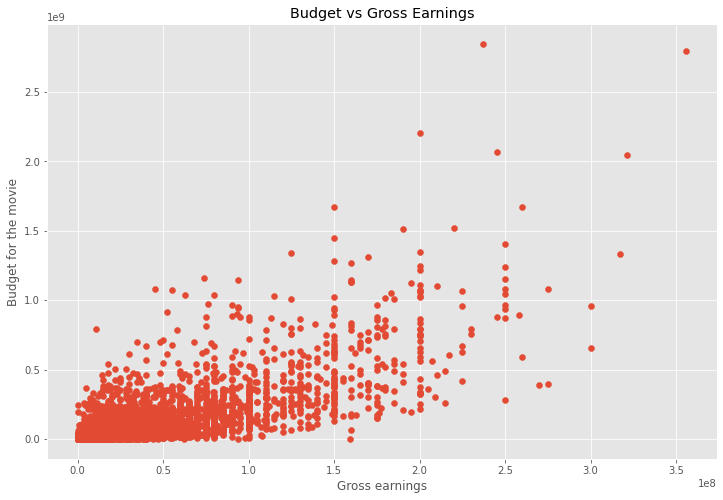

In [ ]:
#scatterplot of budget vas gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for the movie')
plt.show()

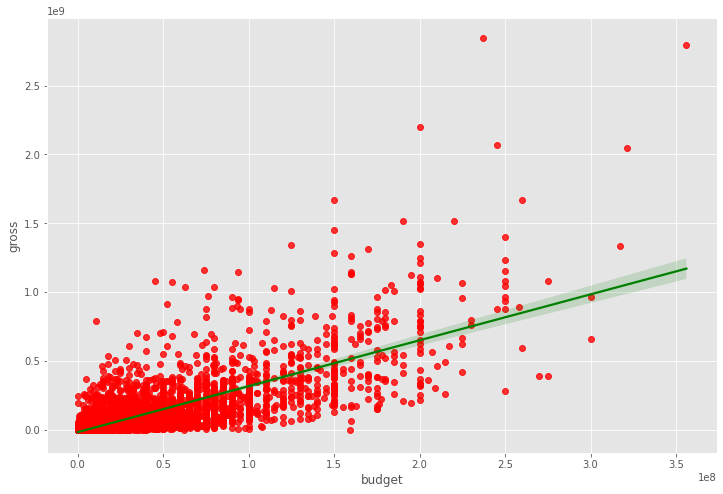

In [ ]:
#plotting a reg plt to determine if budget vs gross is correlated using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"green"})

In [ ]:
df.head(3)

name  rating  genre  year  ...      gross  company  runtime  Correct Year
0  4692       6      6  1980  ...   46998772     1426      146             0
1  3929       6      1  1980  ...   58853106      452      104             0
2  3641       4      0  1980  ...  538375067      945      124             0

[3 rows x 16 columns]

In [ ]:
#Looking at correlation

df.corr(method = 'pearson')

name    rating     genre  ...   company   runtime  Correct Year
name          1.000000 -0.029234  0.010996  ...  0.021697  0.010850      0.025542
rating       -0.029234  1.000000  0.147796  ... -0.092357  0.140792      0.022021
genre         0.010996  0.147796  1.000000  ... -0.071334 -0.059237     -0.069147
year          0.025542  0.019499 -0.073167  ... -0.014333  0.075077      0.998726
released     -0.006152  0.018083  0.022142  ... -0.002407  0.008975     -0.005989
score         0.014450  0.065983  0.035106  ...  0.020656  0.414068      0.061923
votes         0.012615  0.006031 -0.135990  ...  0.118470  0.352303      0.203098
director      0.015246  0.014656 -0.008553  ... -0.008223  0.017433     -0.037371
writer        0.012880 -0.003149  0.017578  ... -0.003697 -0.017561     -0.025495
star         -0.006882  0.009196  0.003341  ...  0.014082  0.010108     -0.032687
country      -0.025490  0.008230 -0.009164  ...  0.048569 -0.034477     -0.073569
budget        0.023392 -0.203946 -0.368523  ...  0.170235  0.318695      0.320312
gross         0.005639 -0.181906 -0.244101  ...  0.149553  0.275796      0.268721
company       0.021697 -0.092357 -0.071334  ...  1.000000  0.037585     -0.018806
runtime       0.010850  0.140792 -0.059237  ...  0.037585  1.000000      0.075294
Correct Year  0.025542  0.022021 -0.069147  ... -0.018806  0.075294      1.000000

[16 rows x 16 columns]

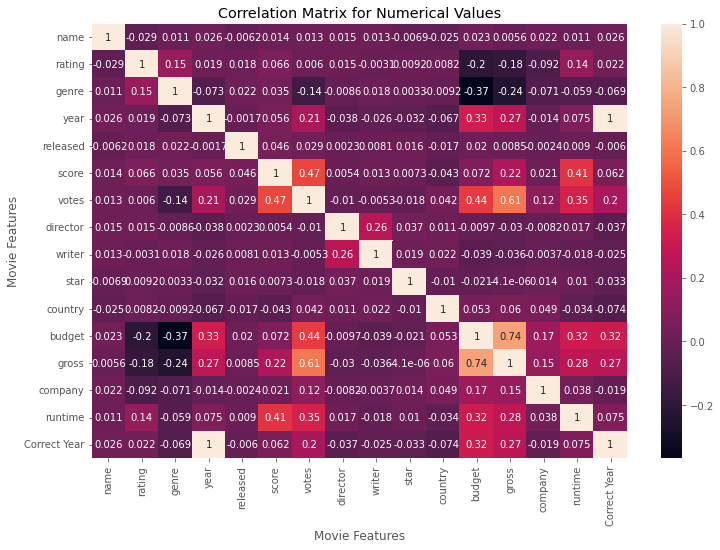

In [ ]:
#visualizing the correlation matrix
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True )
plt.title('Correlation Matrix for Numerical Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized
        

name  rating  genre  year  ...       gross  company  runtime  Correct Year
0     4692       6      6  1980  ...    46998772     1426      146             0
1     3929       6      1  1980  ...    58853106      452      104             0
2     3641       4      0  1980  ...   538375067      945      124             0
3      204       4      4  1980  ...    83453539     1108       88             0
4      732       6      4  1980  ...    39846344     1083       98             0
5     1509       6      9  1980  ...    39754601     1108       95             0
6     3930       6      0  1980  ...   115229890     1397      133             0
7     3122       6      3  1980  ...    23402427      390      129             0
8     3732       4      0  1980  ...   108185706      548      127             1
9     4401       6      3  1980  ...    15795189     1391      100             0
10     332       4      0  1980  ...    70687344     1338      116             0
11    4179       4      1  1980  ...    30031783      320      109             4
12    3029       4      1  1980  ...    49823037     1108      114             0
13    2859       6      6  1980  ...    54766923     1108      124             0
14    1208       6      5  1980  ...    31899000      661      104             0
15    3553       4      6  1980  ...     9709597     1184      103             0
17      66       4      4  1980  ...   103300686      815      109             0
18    4143       6      9  1980  ...    21448782       45       89             0
20     986       6      5  1980  ...    19814523      939      102             0
21    1762       6      1  1980  ...     3484523     1114      219             1
22    4128       4      0  1980  ...    16647800      306      103             0
23    5289       4      8  1980  ...    22762571     1397       96             0
28     700       6      5  1980  ...    37121708     1382      131             0
29     261       6      5  1980  ...    22743674     1108      117             0
33     785       4      6  1980  ...      534816      372       97             1
35    3068       6      4  1980  ...    69847348     1426      109             0
36    4245       6      4  1980  ...    10000000     1143       91             0
37    2618       6      4  1980  ...     6342668      337      101             0
42    4736       6      0  1980  ...     7063886      997      131             0
46    4312       6      0  1980  ...    15716828     1397      109             0
48    4512       4      0  1980  ...    14662035     1397       94             0
50    3648       4      4  1980  ...    10389003      859       89             0
51    2497       6      4  1980  ...     4309490     1397       95             0
53     692       4      0  1980  ...    24265659     1426      116             0
56    5193       4      0  1980  ...     3763988      841      121             0
57    2818       4      4  1980  ...     6216067     1023      103             0
58    4519       6      0  1980  ...    18971000      100      103             0
75    4351       1      1  1980  ...    11000000     1424       97             0
77    5240       6      4  1980  ...     4400000     1382      115             0
80    2971       6      6  1980  ...       59167      282       94             0
92    1973       4      0  1981  ...   389925971     1108      115             1
94     284       6      4  1981  ...    30669378     1147       97             1
95    1301       6      0  1981  ...    25244626       45       99             1
96    4100       2      9  1981  ...     2956630     1197       85             3
97    3031       6      4  1981  ...   111289673      158       94             2
98     603       6      5  1981  ...    12000000      661      108             1
99     861       4      0  1981  ...    41092328      389      118             1
100   1329       6      1  1981  ...    34971136      416      140             1
101   2389       6      0  1981  ... 

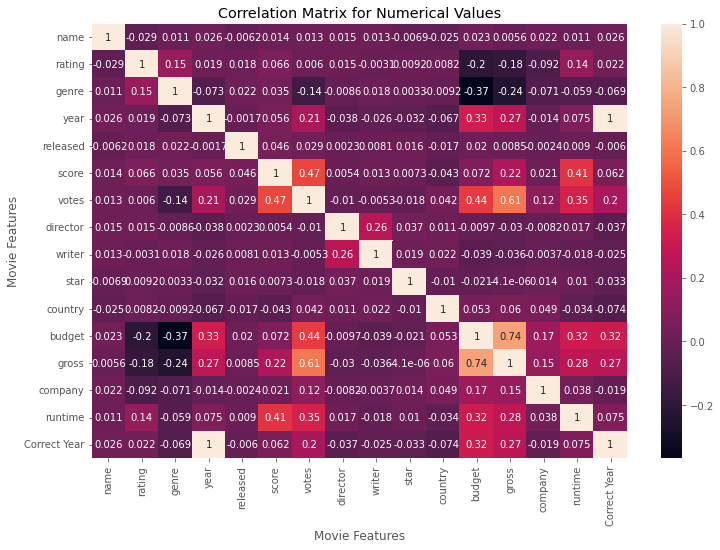

In [ ]:
#visualizing the above matrices

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True )
plt.title('Correlation Matrix for Numerical Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df_numerized.corr()

name    rating     genre  ...   company   runtime  Correct Year
name          1.000000 -0.029234  0.010996  ...  0.021697  0.010850      0.025542
rating       -0.029234  1.000000  0.147796  ... -0.092357  0.140792      0.022021
genre         0.010996  0.147796  1.000000  ... -0.071334 -0.059237     -0.069147
year          0.025542  0.019499 -0.073167  ... -0.014333  0.075077      0.998726
released     -0.006152  0.018083  0.022142  ... -0.002407  0.008975     -0.005989
score         0.014450  0.065983  0.035106  ...  0.020656  0.414068      0.061923
votes         0.012615  0.006031 -0.135990  ...  0.118470  0.352303      0.203098
director      0.015246  0.014656 -0.008553  ... -0.008223  0.017433     -0.037371
writer        0.012880 -0.003149  0.017578  ... -0.003697 -0.017561     -0.025495
star         -0.006882  0.009196  0.003341  ...  0.014082  0.010108     -0.032687
country      -0.025490  0.008230 -0.009164  ...  0.048569 -0.034477     -0.073569
budget        0.023392 -0.203946 -0.368523  ...  0.170235  0.318695      0.320312
gross         0.005639 -0.181906 -0.244101  ...  0.149553  0.275796      0.268721
company       0.021697 -0.092357 -0.071334  ...  1.000000  0.037585     -0.018806
runtime       0.010850  0.140792 -0.059237  ...  0.037585  1.000000      0.075294
Correct Year  0.025542  0.022021 -0.069147  ... -0.018806  0.075294      1.000000

[16 rows x 16 columns]

In [ ]:
corelation_mat = df_numerized.corr()
corr_pairs = corelation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              Correct Year    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [ ]:
#sorting the correlated values
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
country       Correct Year   -0.073569
Correct Year  country        -0.073569
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
genre         Correct Year   -0.069147
Correct Year  genre          -0.069147
year          country        -0.066748
country       year           -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
score         country        -0.043051
country       score      

In [ ]:
#listing pairs with high correlation value than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          Correct Year    0.998726
Correct Year  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Correct Year  Correct Year    1.000000
dtype: float64

# **CONCLUSION**
## **Votes and Budgets have the highest **CORRELATION** to gross earnings**
## **Company has low correlation**